In [387]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

In [388]:
S=276618
V=599864
W=97500
E=390
EB=39
I=974
IB=97
ICU=18
R=24500

UC=0.65*1000000
WC=0.005*1000000

y0 = [S,V,W,E,EB,I,IB,ICU,R, UC, WC]

M = sum(y0[:-2])
print(M)


Rt_base = 4.5     # 0. - 3.5
ramping = 1
eta = 0.5
#kappa =0# 0.5 - 0.85
kappa = 0.9      # 0.7 - 0.95
sigma = 0.5      # 0.5 - 1.

gamma = 0.1      # 0.088 - 0.1
gamma_ICU = 0.1  # 0.08 - 0.2
delta = 0.007   # 0.00001 - 0.007
rho = 0.25

omega_v_b = 1./(6*30)
omega_n_b = 1./(12*30)

chi_0 = 0.1
chi_1 = 0.5

alpha_w = 0.005
alpha_u = 0.01
alpha_R = 5e-3

n = 1.
k_v = M*omega_v_b*(1/(gamma+delta))
k_n = M*omega_n_b*(1/(gamma+delta))

L_w = alpha_w
L_omega_v = 1/k_v
L_omega_n = 1/k_n

e_R = 0.
e_u = 0.
e_w = 0.

Phi_0 = 0.0025
phi_0 = 0.0025


u_base = 0.5
w_max = 1-chi_1


#lamb2 = 6 #a parameter that is used if we go for the logistic approach 



tau = 30*1
mu=0
#mu = 0.267
d_0 = 274
d_mu = 0.

1000000


In [389]:
d = {'S':0,'V':1,'W':2,'E':3,'EB':4,'I':5,'IB':6,'ICU':7,'R':8, 'UC':9, 'WC':10}
def fun(t,y):
    return [dS(t,y), dV(t,y), dW(t,y), dE(t,y), dEB(t,y), dI(t,y), dIB(t,y), dICU(t,y), dR(t,y), dUC(t,y), dWC(t,y)]

def dS(t,y):
    return - gamma*Rt(Rt_base,y[d['ICU']],t)*y[d['S']]/M*(y[d['I']]+sigma*y[d['IB']]) \
           - Phi(y[d['ICU']],y[d['UC']])*M
def dV(t,y):
    return - (1-eta)*gamma*Rt(Rt_base, y[d['ICU']],t)*y[d['V']]/M*(y[d['I']]+sigma*y[d['IB']]) \
           + M*Phi(y[d['ICU']],y[d['UC']]) + M*phi(y[d['ICU']],y[d['WC']]) \
           - omega_v(y[d['I']],y[d['IB']])*y[d['V']]
def dW(t,y):
    return + omega_v(y[d['I']],y[d['IB']])*y[d['V']] \
           + omega_n(y[d['I']],y[d['IB']])*y[d['R']] \
           - gamma*Rt(Rt_base, y[d['ICU']],t)*y[d['W']]/M*(y[d['I']]+sigma*y[d['IB']]) \
           - M*phi(y[d['ICU']],y[d['WC']])
def dE(t,y):
    return + gamma*Rt(Rt_base, y[d['ICU']],t)*(y[d['S']]+y[d['W']])/M*(y[d['I']]+sigma*y[d['IB']]) \
           - rho*y[d['E']]
def dEB(t,y):
    return + (1-eta)*gamma*Rt(Rt_base, y[d['ICU']],t)*y[d['V']]/M*(y[d['I']]+sigma*y[d['IB']]) \
           - rho*y[d['EB']]
def dI(t,y):
    return + rho*y[d['E']] \
           - (gamma+delta)*y[d['I']]
def dIB(t,y):
    return + rho*y[d['EB']] \
           - (gamma*(1+kappa)+delta*(1-kappa))*y[d['IB']]
def dICU(t,y):
    return + delta*(y[d['I']]+(1-kappa)*y[d['IB']]) \
           - gamma_ICU*y[d['ICU']]
def dR(t,y):
    return + gamma*(y[d['I']]+(1+kappa)*y[d['IB']]) \
           - omega_n(y[d['I']],y[d['IB']])*y[d['R']] \
           + gamma_ICU*y[d['ICU']]
def dUC(t,y):
    return M*Phi(y[d['ICU']], y[d['UC']])
def dWC(t,y):
    return M*phi(y[d['ICU']], y[d['WC']])


def Rt(Rt_base, ICU, t):
    return Rt_base*np.exp(-alpha_R*ICU -e_R) * Gamma(t)

def Phi(ICU,UC):
    if u_w(ICU) < UC/M: return 0
    return min(Phi_0, u_w(ICU)-UC/M)

def u_w(ICU):
    return u_base + (u_max()-u_base)*(1-np.exp(-alpha_u*ICU-e_u))

#def u_c(S):
 #   return 1 - S/M

def u_max():
    return 1 - chi_0

def phi(ICU,WC):
    if w_w(ICU) < WC/M: return 0
    return min(phi_0, w_w(ICU)-WC/M)

def w_w(ICU):
    return w_max*(1-np.exp(-alpha_w*ICU-e_w))


#def w_c(W, S):
 #   return 1 - W/M - S/M

def Gamma(t):
    return 1 + mu*np.cos(2*np.pi*(t+d_0-d_mu)/365.)

def OLD_omega_v(I,IB):
    return omega_v_b*(1-(I_eff(I,IB)**n/((k_v/2)**n+I_eff(I,IB)**n)))

def OLD_omega_n(I,IB):
    return omega_n_b*(1-(I_eff(I,IB)**n/((k_n/2)**n+I_eff(I,IB)**n)))

def omega_v(I,IB):
    return omega_v_b*(1-(I_eff(I,IB)**n/((k_v/2)**n+I_eff(I,IB)**n)))

def omega_n(I,IB):
    return omega_n_b*(1-(I_eff(I,IB)**n/((k_n/2)**n+I_eff(I,IB)**n)))

def I_eff(I,IB):
    return I + sigma*IB

In [390]:
t_max = 365/2
steps = 20000
result = solve_ivp(fun, (0,t_max), y0, t_eval=[(t_max/steps)*x for x in range(steps)])



In [391]:
y1 = []
for i in result.y[:,-1]:
    y1.append(i)

#If we dont want to change R_t, set ramping to one here: 
#ramping = 1
Rt_base = Rt_base*ramping
result1 = solve_ivp(fun, (t_max,2*t_max), y1, t_eval=np.linspace(t_max,2*t_max,steps))

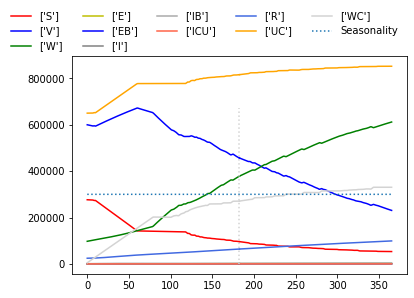

In [392]:
colormap= {0:'r', 1:'b' , 2:'g', 3:'y', 4:'b', 5:'grey', 6:'darkgrey', 7:'tomato', 8:'royalblue', 9:'orange', 10:'lightgrey'}

for i,x in enumerate(result["y"]):
    plt.plot(result["t"],x,label=[k for k,v in d.items() if v == i], color=colormap[i])
    
for i,x in enumerate(result1["y"]):
    plt.plot(result1["t"],x, color=colormap[i])

plt.plot(result.t*2, 300000*Gamma(result.t*2), linestyle=':', label='Seasonality')
plt.plot(np.ones(len(np.linspace(0,np.max(result.y[1]))))*t_max, np.linspace(0,np.max(result.y[1])), linestyle=':', color='lightgray')
plt.legend(bbox_to_anchor=[1, 1.25], ncol=5, frameon=False)
plt.show()




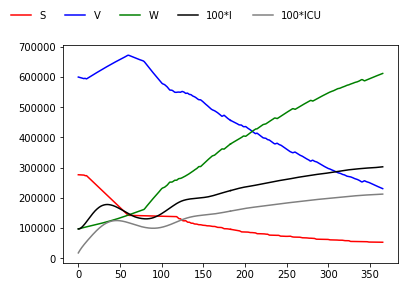

In [393]:
plt.plot(result.t,result.y[0], label='S', color='r')
plt.plot(result.t,result.y[1], label='V', color='b')
plt.plot(result.t,result.y[2], label='W', color='g')
plt.plot(result.t,100*result.y[5], label='100*I', color='black')
plt.plot(result.t,1000*result.y[7], label='100*ICU', color='grey')

plt.plot(result1.t,result1.y[0], color='r')
plt.plot(result1.t,result1.y[1], color='b')
plt.plot(result1.t,result1.y[2], color='g')
plt.plot(result1.t,100*result1.y[5], color='black')
plt.plot(result1.t,1000*result1.y[7], color='grey')

plt.legend(bbox_to_anchor=[0.8, 1.2], ncol=5, frameon=False)
plt.show()

Text(0.5, 1.0, 'Infectious compartments')

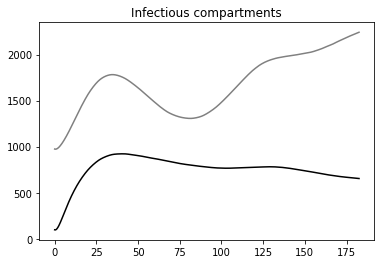

In [394]:
plt.plot(result.t,result.y[5], label='I', color='grey')
plt.plot(result.t,result.y[6], label='IB', color='black')
plt.title('Infectious compartments')

Text(0.5, 1.0, 'ICU')

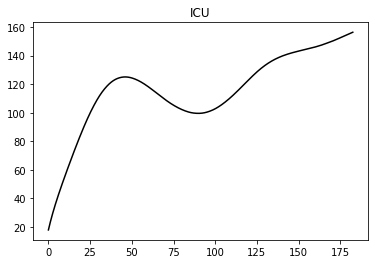

In [395]:
plt.plot(result.t,result.y[7], label='ICU', color='black')
plt.title('ICU')

test


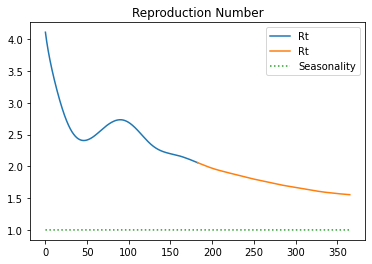

In [396]:
plt.plot(result.t, Rt(Rt_base/ramping, result.y[7], result.t), label='Rt')
plt.plot(result1.t, Rt(Rt_base, result1.y[7], result1.t), label='Rt')
plt.plot(result.t*2, Gamma(result.t*2), linestyle=':', label='Seasonality')
print('test')
plt.legend()
plt.title('Reproduction Number')
plt.show()

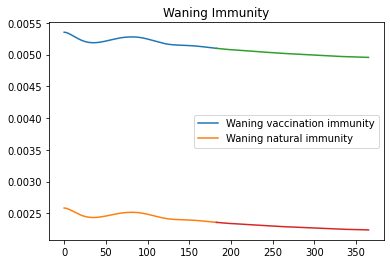

In [397]:
plt.plot(result.t, omega_v(result.y[d['I']], result.y[d['ICU']]), label='Waning vaccination immunity')
plt.plot(result.t, omega_n(result.y[d['I']], result.y[d['ICU']]), label='Waning natural immunity')
plt.plot(result1.t, omega_v(result1.y[d['I']], result1.y[d['ICU']]))
plt.plot(result1.t, omega_n(result1.y[d['I']], result1.y[d['ICU']]))
plt.title('Waning Immunity')
plt.legend()
plt.show()

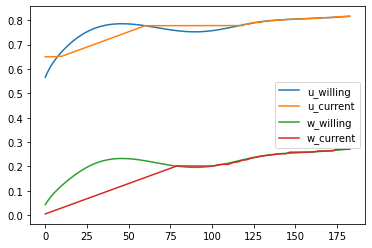

In [398]:
plt.plot(result.t, u_w(result.y[d['ICU']]), label='u_willing')
plt.plot(result.t, 1/M*result.y[d['UC']], label='u_current')
#plt.plot(result.t, u_c(result.y[d['S']]), label='u_current')
plt.plot(result.t, w_w(result.y[d['ICU']]), label='w_willing')
plt.plot(result.t, 1/M*result.y[d['WC']], label='w_current')
#plt.plot(result.t, w_c(result.y[d['W']], result.y[d['S']]), label='w_current')
plt.legend()

In [399]:
sum(result['y'])
Mtest = sum(result['y'][:-2])
print(Mtest)

[1000000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
